In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import stat
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('listings.csv')
df.head()

id                        listing_url       scrape_id last_scraped  \
0   958   https://www.airbnb.com/rooms/958  20211006030728   2021-10-06   
1  5858  https://www.airbnb.com/rooms/5858  20211006030728   2021-10-06   
2  7918  https://www.airbnb.com/rooms/7918  20211006030728   2021-10-06   
3  8142  https://www.airbnb.com/rooms/8142  20211006030728   2021-10-06   
4  8339  https://www.airbnb.com/rooms/8339  20211006030728   2021-10-06   

                                                name  \
0              Bright, Modern Garden Unit - 1BR/1BTH   
1                                 Creative Sanctuary   
2         A Friendly Room - UCSF/USF - San Francisco   
3  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4                    Historic Alamo Square Victorian   

                                         description  \
0  Please check local laws re Covid before you re...   
1  <b>The space</b><br />We live in a large Victo...   
2  Nice and good public transportation.  7 minute...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  \
0  Quiet cul de sac in friendly neighborhood<br /...   
1  I love how our neighborhood feels quiet but is...   
2  Shopping old town, restaurants, McDonald, Whol...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7c2a199-4c17...     1169   
1  https://a0.muscache.com/pictures/17714/3a7aea1...     8904   
2  https://a0.muscache.com/pictures/26356/8030652...    21994   
3  https://a0.muscache.com/pictures/27832/3b1f9e5...    21994   
4  https://a0.muscache.com/pictures/213fbf05-3545...    24215   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/1169  ...                        4.90   
1   https://www.airbnb.com/users/show/8904  ...                        4.85   
2  https://www.airbnb.com/users/show/21994  ...                        4.60   
3  https://www.airbnb.com/users/show/21994  ...                        4.75   
4  https://www.airbnb.com/users/show/24215  ...                        5.00   

  review_scores_location review_scores_value                    license  \
0                   4.98                4.78  City Registration Pending   
1                   4.77                4.68                        NaN   
2                   4.73                4.00                        NaN   
3                   4.63                4.63                        NaN   
4                   4.94                4.75                STR-0000264   

  instant_bookable calculated_host_listings_count  \
0                f                              1   
1                f                              1   
2                f                              9   
3                f                              9   
4                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           0   
3                                           0   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            9   
3                                            9   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              3.54  
1                                           0              0.77  
2                                           0              0.17  
3                                           0  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6566 non-null   int64  
 1   listing_url                                   6566 non-null   object 
 2   scrape_id                                     6566 non-null   int64  
 3   last_scraped                                  6566 non-null   object 
 4   name                                          6566 non-null   object 
 5   description                                   6491 non-null   object 
 6   neighborhood_overview                         4789 non-null   object 
 7   picture_url                                   6566 non-null   object 
 8   host_id                                       6566 non-null   int64  
 9   host_url                                      6566 non-null   o

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
df_tx = df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name','picture_url', 'host_id', 'host_url','host_name', 'host_since', 'host_location', 'host_about','host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_total_listings_count', 'host_has_profile_pic','neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude', 'property_type', 
             'bathrooms',  'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability','availability_30', 'availability_60', 'availability_90','calendar_last_scraped','number_of_reviews_ltm', 
            'last_review', 'license', 'first_review', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', ], axis=1)

In [6]:
df = df_tx.drop(['description', 'neighborhood_overview', 'amenities', 'host_verifications'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           4951 non-null   object 
 1   host_response_rate           4951 non-null   object 
 2   host_acceptance_rate         5049 non-null   object 
 3   host_is_superhost            6552 non-null   object 
 4   host_listings_count          6552 non-null   float64
 5   host_identity_verified       6552 non-null   object 
 6   room_type                    6566 non-null   object 
 7   accommodates                 6566 non-null   int64  
 8   bathrooms_text               6556 non-null   object 
 9   bedrooms                     5633 non-null   float64
 10  beds                         6500 non-null   float64
 11  price                        6566 non-null   object 
 12  minimum_nights               6566 non-null   int64  
 13  availability_365  

In [8]:
df.isnull().sum().sort_values(ascending=False)

host_response_time             1615
host_response_rate             1615
host_acceptance_rate           1517
review_scores_value            1430
review_scores_location         1430
review_scores_checkin          1430
review_scores_communication    1429
review_scores_cleanliness      1429
review_scores_accuracy         1429
reviews_per_month              1397
review_scores_rating           1397
bedrooms                        933
beds                             66
host_identity_verified           14
host_listings_count              14
host_is_superhost                14
bathrooms_text                   10
number_of_reviews                 0
availability_365                  0
instant_bookable                  0
price                             0
accommodates                      0
room_type                         0
number_of_reviews_l30d            0
minimum_nights                    0
dtype: int64

In [9]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [10]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [11]:
df.head()

host_response_time  host_response_rate  host_acceptance_rate  \
0      within an hour                 1.0                  0.92   
1                 NaN                 NaN                   NaN   
2      within an hour                 1.0                  1.00   
3      within an hour                 1.0                  1.00   
4  within a few hours                 1.0                  0.00   

  host_is_superhost  host_listings_count host_identity_verified  \
0                 t                  1.0                      t   
1                 f                  2.0                      t   
2                 f                 10.0                      t   
3                 f                 10.0                      t   
4                 f                  2.0                      t   

         room_type  accommodates  bathrooms_text  bedrooms  ...  \
0  Entire home/apt             3          1 bath       1.0  ...   
1  Entire home/apt             5          1 bath       2.0  ...   
2     Private room             2  4 shared baths       1.0  ...   
3     Private room             2  4 shared baths       1.0  ...   
4  Entire home/apt             4       1.5 baths       2.0  ...   

   number_of_reviews_l30d review_scores_rating  review_scores_accuracy  \
0                       5                 4.87                    4.94   
1                       0                 4.88                    4.85   
2                       0                 4.20                    3.73   
3                       0                 4.63                    4.38   
4                       0                 4.87                    4.88   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.95                   4.96   
1                       4.87                   4.89   
2                       3.87                   4.67   
3                       4.38                   4.75   
4                       5.00                   4.94   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.90                    4.98                 4.78   
1                         4.85                    4.77                 4.68   
2                         4.60                    4.73                 4.00   
3                         4.75                    4.63                 4.63   
4                         5.00                    4.94                 4.75   

   instant_bookable  reviews_per_month  
0                 f               3.54  
1                 f               0.77  
2                 f               0.17  
3                 f               0.10  
4                 f               0.19  

[5 rows x 25 columns]

In [12]:
df.groupby('host_identity_verified').size()

host_identity_verified
f     960
t    5592
dtype: int64

In [13]:
df.groupby('review_scores_rating').size().sort_values(ascending=False)

review_scores_rating
5.00    1588
4.00     153
4.94     126
4.91     126
4.67     124
        ... 
3.93       1
2.86       1
3.94       1
1.50       1
4.12       1
Length: 119, dtype: int64

In [14]:
df.groupby('host_acceptance_rate').size().sort_values(ascending=False).head()

host_acceptance_rate
1.00    1563
0.98     317
0.99     281
0.97     241
0.00     191
dtype: int64

In [15]:
df['host_response_rate'].fillna(1, inplace=True)
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean(), inplace=True)
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['beds'].fillna(1, inplace=True)
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].mean(), inplace=True)
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].mean(), inplace=True)
df['review_scores_checkin'].fillna(df['review_scores_checkin'].mean(), inplace=True)
df['review_scores_communication'].fillna(df['review_scores_communication'].mean(), inplace=True)
df['review_scores_location'].fillna(df['review_scores_location'].mean(), inplace=True)
df['review_scores_value'].fillna(df['review_scores_value'].mean(), inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

df['host_is_superhost'].fillna('f', inplace=True)
df['host_identity_verified'].fillna('t', inplace=True)
df['bathrooms_text'].fillna('1 bath', inplace=True)


In [16]:
df.groupby('room_type').size()

room_type
Entire home/apt    4160
Hotel room           84
Private room       2191
Shared room         131
dtype: int64

In [17]:
df.groupby('host_response_time').size()

host_response_time
a few days or more     164
within a day           542
within a few hours    1052
within an hour        3193
dtype: int64

In [18]:
df.groupby('host_response_time').size()

host_response_time
a few days or more     164
within a day           542
within a few hours    1052
within an hour        3193
dtype: int64

In [19]:
df['host_response_time'] = df['host_response_time'].replace('a few days or more', 1)
df['host_response_time'] = df['host_response_time'].replace('within a day', 2)
df['host_response_time'] = df['host_response_time'].replace('within a few hours', 3)
df['host_response_time'] = df['host_response_time'].replace('within an hour', 4)

In [20]:
df['host_response_time'].fillna(4, inplace=True)

In [21]:
df['host_is_superhost'] = df['host_is_superhost'].replace('t', 1)
df['host_is_superhost'] = df['host_is_superhost'].replace('f', 0)

In [22]:
df['host_identity_verified'] = df['host_identity_verified'].replace('t', 1)
df['host_identity_verified'] = df['host_identity_verified'].replace('f', 0)

In [23]:
df.groupby('room_type').size()

room_type
Entire home/apt    4160
Hotel room           84
Private room       2191
Shared room         131
dtype: int64

In [24]:
df['room_type'] = df['room_type'].replace('Entire home/apt', 4)
df['room_type'] = df['room_type'].replace('Private room', 3)
df['room_type'] = df['room_type'].replace('Hotel room', 2)
df['room_type'] = df['room_type'].replace('Shared room', 1)

In [25]:
df['instant_bookable'] = df['instant_bookable'].replace('t', 1)
df['instant_bookable'] = df['instant_bookable'].replace('f', 0)

In [26]:
df['bathrooms_text'] = df['bathrooms_text'].replace('1 private bath', '1 bath')
df['bathrooms_text'] = df['bathrooms_text'].replace('Private half-bath', 'Half-bath')
df['bathrooms_text'] = df['bathrooms_text'].replace('0 shared baths', '0 baths')

In [27]:
df.groupby('bathrooms_text').size()

bathrooms_text
0 baths               43
1 bath              4114
1 shared bath        656
1.5 baths            285
1.5 shared baths     117
10 baths               2
10 shared baths       17
2 baths              749
2 shared baths       100
2.5 baths            108
2.5 shared baths      34
3 baths               85
3 shared baths        21
3.5 baths             42
3.5 shared baths       9
4 baths               34
4 shared baths        25
4.5 baths             13
4.5 shared baths       2
5 baths               18
5 shared baths        64
5.5 baths              1
6 shared baths         6
6.5 shared baths       1
8 shared baths         5
Half-bath              9
Shared half-bath       6
dtype: int64

In [28]:
df['bathrooms_text'] = df['bathrooms_text'].replace('0 baths', 0)
df['bathrooms_text'] = df['bathrooms_text'].replace('1 bath', 1.25)
df['bathrooms_text'] = df['bathrooms_text'].replace('1 shared bath', 1)
df['bathrooms_text'] = df['bathrooms_text'].replace('1.5 shared baths', 1.5)
df['bathrooms_text'] = df['bathrooms_text'].replace('1.5 baths', 1.75)
df['bathrooms_text'] = df['bathrooms_text'].replace('10 shared baths', 10)
df['bathrooms_text'] = df['bathrooms_text'].replace('10 baths', 10.25)
df['bathrooms_text'] = df['bathrooms_text'].replace('2 shared baths', 2)
df['bathrooms_text'] = df['bathrooms_text'].replace('2 baths', 2.25)
df['bathrooms_text'] = df['bathrooms_text'].replace('2.5 shared baths', 2.5)
df['bathrooms_text'] = df['bathrooms_text'].replace('2.5 baths', 2.75)
df['bathrooms_text'] = df['bathrooms_text'].replace('3 shared baths', 3)
df['bathrooms_text'] = df['bathrooms_text'].replace('3 baths', 3.25)
df['bathrooms_text'] = df['bathrooms_text'].replace('3.5 shared baths', 3.5)
df['bathrooms_text'] = df['bathrooms_text'].replace('3.5 baths', 3.75)
df['bathrooms_text'] = df['bathrooms_text'].replace('4 shared baths', 4)
df['bathrooms_text'] = df['bathrooms_text'].replace('4 baths', 4.25)
df['bathrooms_text'] = df['bathrooms_text'].replace('4.5 shared baths', 4.5)
df['bathrooms_text'] = df['bathrooms_text'].replace('4.5 baths', 4.75)
df['bathrooms_text'] = df['bathrooms_text'].replace('5 shared baths', 5)
df['bathrooms_text'] = df['bathrooms_text'].replace('5 baths', 5.25)
df['bathrooms_text'] = df['bathrooms_text'].replace('5.5 baths', 5.75)
df['bathrooms_text'] = df['bathrooms_text'].replace('6 shared baths', 6)
df['bathrooms_text'] = df['bathrooms_text'].replace('6.5 shared baths', 6.5)
df['bathrooms_text'] = df['bathrooms_text'].replace('8 shared baths', 8)
df['bathrooms_text'] = df['bathrooms_text'].replace('Half-bath', 0.75)
df['bathrooms_text'] = df['bathrooms_text'].replace('Shared half-bath', 0.5)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           6566 non-null   float64
 1   host_response_rate           6566 non-null   float64
 2   host_acceptance_rate         6566 non-null   float64
 3   host_is_superhost            6566 non-null   int64  
 4   host_listings_count          6566 non-null   float64
 5   host_identity_verified       6566 non-null   int64  
 6   room_type                    6566 non-null   int64  
 7   accommodates                 6566 non-null   int64  
 8   bathrooms_text               6566 non-null   float64
 9   bedrooms                     6566 non-null   float64
 10  beds                         6566 non-null   float64
 11  price                        6566 non-null   object 
 12  minimum_nights               6566 non-null   int64  
 13  availability_365  

In [30]:
df.head()

host_response_time  host_response_rate  host_acceptance_rate  \
0                 4.0                 1.0               0.92000   
1                 4.0                 1.0               0.83201   
2                 4.0                 1.0               1.00000   
3                 4.0                 1.0               1.00000   
4                 3.0                 1.0               0.00000   

   host_is_superhost  host_listings_count  host_identity_verified  room_type  \
0                  1                  1.0                       1          4   
1                  0                  2.0                       1          4   
2                  0                 10.0                       1          3   
3                  0                 10.0                       1          3   
4                  0                  2.0                       1          4   

   accommodates  bathrooms_text  bedrooms  ...  number_of_reviews_l30d  \
0             3            1.25       1.0  ...                       5   
1             5            1.25       2.0  ...                       0   
2             2            4.00       1.0  ...                       0   
3             2            4.00       1.0  ...                       0   
4             4            1.75       2.0  ...                       0   

  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                 4.87                    4.94                       4.95   
1                 4.88                    4.85                       4.87   
2                 4.20                    3.73                       3.87   
3                 4.63                    4.38                       4.38   
4                 4.87                    4.88                       5.00   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.96                         4.90                    4.98   
1                   4.89                         4.85                    4.77   
2                   4.67                         4.60                    4.73   
3                   4.75                         4.75                    4.63   
4                   4.94                         5.00                    4.94   

   review_scores_value  instant_bookable  reviews_per_month  
0                 4.78                 0               3.54  
1                 4.68                 0               0.77  
2                 4.00                 0               0.17  
3                 4.63                 0               0.10  
4                 4.75                 0               0.19  

[5 rows x 25 columns]

In [31]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)
df['price'].describe()

count     6566.000000
mean       234.903442
std        687.402372
min          0.000000
25%         95.000000
50%        150.000000
75%        240.000000
max      25000.000000
Name: price, dtype: float64

In [32]:
df['reviews_per_month'].describe()

count    6566.000000
mean        1.943993
std         4.616115
min         0.010000
25%         0.300000
50%         1.240000
75%         1.943993
max       126.000000
Name: reviews_per_month, dtype: float64

In [33]:
df.review_scores_rating.describe()

count    5169.00000
mean        4.73348
std         0.55754
min         0.00000
25%         4.71000
50%         4.89000
75%         5.00000
max         5.00000
Name: review_scores_rating, dtype: float64

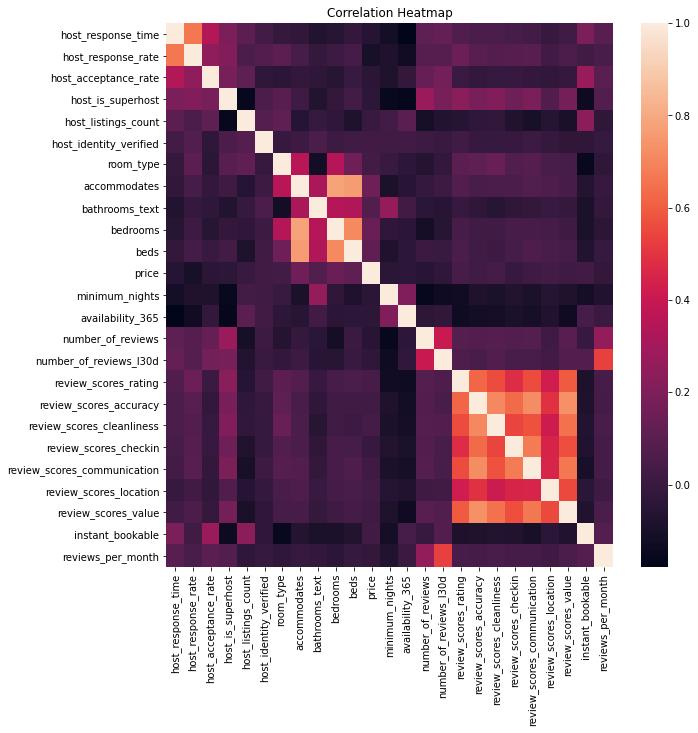

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.title("Correlation Heatmap");

In [35]:
df.describe()

host_response_time  host_response_rate  host_acceptance_rate  \
count         6566.000000         6566.000000           6566.000000   
mean             3.599756            0.953058              0.832010   
std              0.745043            0.158807              0.219956   
min              1.000000            0.000000              0.000000   
25%              3.000000            1.000000              0.830000   
50%              4.000000            1.000000              0.860000   
75%              4.000000            1.000000              0.990000   
max              4.000000            1.000000              1.000000   

       host_is_superhost  host_listings_count  host_identity_verified  \
count        6566.000000          6566.000000             6566.000000   
mean            0.438928            72.635989                0.853792   
std             0.496294           318.630072                0.353341   
min             0.000000             0.000000                0.000000   
25%             0.000000             1.000000                1.000000   
50%             0.000000             2.000000                1.000000   
75%             1.000000            12.000000                1.000000   
max             1.000000          1987.000000                1.000000   

         room_type  accommodates  bathrooms_text     bedrooms  ...  \
count  6566.000000   6566.000000     6566.000000  6566.000000  ...   
mean      3.580871      3.094883        1.566631     1.514291  ...   
std       0.623549      1.833757        0.880166     0.794411  ...   
min       1.000000      0.000000        0.000000     1.000000  ...   
25%       3.000000      2.000000        1.250000     1.000000  ...   
50%       4.000000      2.000000        1.250000     1.000000  ...   
75%       4.000000      4.000000        1.500000     2.000000  ...   
max       4.000000     16.000000       10.250000     9.000000  ...   

       number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
count             6566.000000            5169.00000             6566.000000   
mean                 0.720682               4.73348                4.816747   
std                  2.084934               0.55754                0.351011   
min                  0.000000               0.00000                0.000000   
25%                  0.000000               4.71000                4.816747   
50%                  0.000000               4.89000                4.880000   
75%                  0.000000               5.00000                5.000000   
max                 51.000000               5.00000                5.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                6566.000000            6566.000000   
mean                    4.764933               4.881589   
std                     0.375929               0.283298   
min                     0.000000               0.000000   
25%                     4.764933               4.881589   
50%                     4.820000               4.940000   
75%                     4.990000               5.000000   
max                     5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                  6566.000000             6566.000000   
mean                      4.857972                4.800111   
std                       0.326856                0.340783   
min                       1.000000                0.000000   
25%                       4.857972                4.800111   
50%                       4.930000                4.840000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  instant_bookable  reviews_per_month  
count          6566.000000       6566.000000        6566.000000  
mean              4.661340          0.359580           1.943993  
std               0.393623          0.479914           4.616115  
min        

In [36]:
df.corr()

host_response_time  host_response_rate  \
host_response_time                     1.000000            0.664398   
host_response_rate                     0.664398            1.000000   
host_acceptance_rate                   0.340192            0.248017   
host_is_superhost                      0.188056            0.207754   
host_listings_count                    0.107557            0.054949   
host_identity_verified                 0.032846            0.071871   
room_type                             -0.014581            0.103472   
accommodates                          -0.024823            0.041387   
bathrooms_text                        -0.067802           -0.016137   
bedrooms                              -0.057520            0.014207   
beds                                  -0.018220            0.035802   
price                                 -0.062204           -0.103809   
minimum_nights                        -0.113975           -0.079877   
availability_365                      -0.177634           -0.125758   
number_of_reviews                      0.110124            0.086639   
number_of_reviews_l30d                 0.130219            0.082762   
review_scores_rating                   0.067930            0.147395   
review_scores_accuracy                 0.053504            0.091991   
review_scores_cleanliness              0.052578            0.077919   
review_scores_checkin                  0.040198            0.085257   
review_scores_communication            0.032652            0.089262   
review_scores_location                -0.005585            0.026542   
review_scores_value                    0.023793            0.060339   
instant_bookable                       0.190842            0.020185   
reviews_per_month                      0.092453            0.048694   

                             host_acceptance_rate  host_is_superhost  \
host_response_time                       0.340192           0.188056   
host_response_rate                       0.248017           0.207754   
host_acceptance_rate                     1.000000           0.177959   
host_is_superhost                        0.177959           1.000000   
host_listings_count                      0.110379          -0.156071   
host_identity_verified                  -0.034053           0.059388   
room_type                               -0.039830           0.095947   
accommodates                            -0.020191           0.018335   
bathrooms_text                          -0.034486          -0.071670   
bedrooms                                -0.055785          -0.018936   
beds                                    -0.000843           0.032153   
price                                   -0.039704          -0.036758   
minimum_nights                          -0.084608          -0.154519   
availability_365                        -0.019901          -0.160337   
number_of_reviews                        0.134920           0.273492   
number_of_reviews_l30d                   0.171619           0.176650   
review_scores_rating                     0.005636           0.227275   
review_scores_accuracy                  -0.016845           0.185290   
review_scores_cleanliness               -0.008471           0.204792   
review_scores_checkin                   -0.006237           0.155754   
review_scores_communication             -0.017461           0.192344   
review_scores_location                  -0.023859           0.069553   
review_scores_value                     -0.014010           0.173011   
instant_bookable                         0.274953          -0.138337   
reviews_per_month                        0.102682           0.072128   

                             host_listings_count  host_identity_verified  \
host_response_time                      0.107557                0.032846   
host_response_rate                      0.054949                0.071871   
host_acceptance_rate                    0.110379               -0.034053   
host_

In [37]:
df.describe()

host_response_time  host_response_rate  host_acceptance_rate  \
count         6566.000000         6566.000000           6566.000000   
mean             3.599756            0.953058              0.832010   
std              0.745043            0.158807              0.219956   
min              1.000000            0.000000              0.000000   
25%              3.000000            1.000000              0.830000   
50%              4.000000            1.000000              0.860000   
75%              4.000000            1.000000              0.990000   
max              4.000000            1.000000              1.000000   

       host_is_superhost  host_listings_count  host_identity_verified  \
count        6566.000000          6566.000000             6566.000000   
mean            0.438928            72.635989                0.853792   
std             0.496294           318.630072                0.353341   
min             0.000000             0.000000                0.000000   
25%             0.000000             1.000000                1.000000   
50%             0.000000             2.000000                1.000000   
75%             1.000000            12.000000                1.000000   
max             1.000000          1987.000000                1.000000   

         room_type  accommodates  bathrooms_text     bedrooms  ...  \
count  6566.000000   6566.000000     6566.000000  6566.000000  ...   
mean      3.580871      3.094883        1.566631     1.514291  ...   
std       0.623549      1.833757        0.880166     0.794411  ...   
min       1.000000      0.000000        0.000000     1.000000  ...   
25%       3.000000      2.000000        1.250000     1.000000  ...   
50%       4.000000      2.000000        1.250000     1.000000  ...   
75%       4.000000      4.000000        1.500000     2.000000  ...   
max       4.000000     16.000000       10.250000     9.000000  ...   

       number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
count             6566.000000            5169.00000             6566.000000   
mean                 0.720682               4.73348                4.816747   
std                  2.084934               0.55754                0.351011   
min                  0.000000               0.00000                0.000000   
25%                  0.000000               4.71000                4.816747   
50%                  0.000000               4.89000                4.880000   
75%                  0.000000               5.00000                5.000000   
max                 51.000000               5.00000                5.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                6566.000000            6566.000000   
mean                    4.764933               4.881589   
std                     0.375929               0.283298   
min                     0.000000               0.000000   
25%                     4.764933               4.881589   
50%                     4.820000               4.940000   
75%                     4.990000               5.000000   
max                     5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                  6566.000000             6566.000000   
mean                      4.857972                4.800111   
std                       0.326856                0.340783   
min                       1.000000                0.000000   
25%                       4.857972                4.800111   
50%                       4.930000                4.840000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  instant_bookable  reviews_per_month  
count          6566.000000       6566.000000        6566.000000  
mean              4.661340          0.359580           1.943993  
std               0.393623          0.479914           4.616115  
min        

In [38]:
import plotly.graph_objects as go
import plotly.express as px

In [39]:
price = px.histogram(df, x="price",title="Histogram of Price")
price.show()

In [40]:
amount = px.histogram(df, x="reviews_per_month",title="Histogram of reviews_per_month")
amount.show()

In [41]:
satis = px.histogram(df, x="review_scores_rating",title="Histogram of Satisfaction")
satis.show()

In [42]:
df.to_csv("listing1.csv",index=False)

In [43]:
df_p = df.drop(['reviews_per_month','review_scores_rating' ], axis=1)
df_p.dropna(inplace=True)
df_p.to_csv("listingpri.csv",index=False)

In [44]:
df_a = df.drop(['price','review_scores_rating'], axis=1)
df_a.to_csv("listingamo.csv",index=False)

In [45]:
df_s = df.drop(['reviews_per_month','price'], axis=1)
df_s.dropna(inplace=True)
df_s.to_csv("listingsat.csv",index=False)

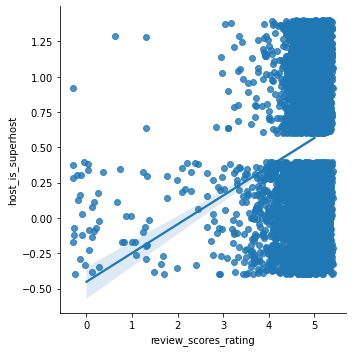

In [46]:
sns.lmplot("review_scores_rating", "host_is_superhost", df, y_jitter=0.40, x_jitter=.40);

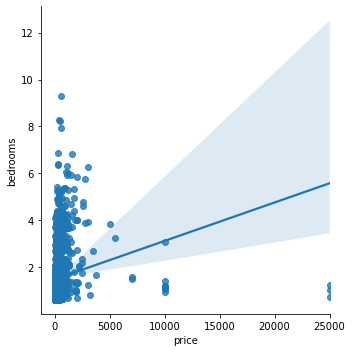

In [47]:
sns.lmplot("price", "bedrooms", df, y_jitter=0.40, x_jitter=.40);

# modeling

In [48]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [49]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

# Linear Regression

In [50]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6566 entries, 0 to 6565
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           6566 non-null   float64
 1   host_response_rate           6566 non-null   float64
 2   host_acceptance_rate         6566 non-null   float64
 3   host_is_superhost            6566 non-null   int64  
 4   host_listings_count          6566 non-null   float64
 5   host_identity_verified       6566 non-null   int64  
 6   room_type                    6566 non-null   int64  
 7   accommodates                 6566 non-null   int64  
 8   bathrooms_text               6566 non-null   float64
 9   bedrooms                     6566 non-null   float64
 10  beds                         6566 non-null   float64
 11  price                        6566 non-null   float64
 12  minimum_nights               6566 non-null   int64  
 13  availability_365  

In [51]:
df_p.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'availability_365', 'number_of_reviews',
       'number_of_reviews_l30d', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [52]:
#assigning columns to X and Y variables
y = df_p['price'] 
X = df_p.drop(['price'], axis =1)

In [53]:
#develop a multiple regression model1
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [54]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

0           1
0            host_response_time   15.521829
1            host_response_rate -523.933021
2          host_acceptance_rate  -43.604655
3             host_is_superhost  -19.994470
4           host_listings_count   -0.002788
5        host_identity_verified   68.434076
6                     room_type  -16.982878
7                  accommodates   49.788427
8                bathrooms_text   24.746357
9                      bedrooms   41.600440
10                         beds  -14.162317
11               minimum_nights   -0.609774
12             availability_365   -0.183693
13            number_of_reviews   -0.253735
14       number_of_reviews_l30d   -4.864545
15       review_scores_accuracy   15.192290
16    review_scores_cleanliness   97.487405
17        review_scores_checkin -112.467199
18  review_scores_communication   24.899821
19       review_scores_location   38.686433
20          review_scores_value  -15.087718
21             instant_bookable   59.554674

In [55]:
print ("mean_absolute_error :",metrics.mean_absolute_error(y, model1_y))
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y, model1_y)))

mean_absolute_error : 150.8250305853904
mean square error:  449094.05825016764
variance or r-squared:  0.049435907629570064
root_mean_squared_error :  670.1448039417807


In [56]:
runs_reg_model1 = ols("price~host_response_time+host_response_rate+host_acceptance_rate+host_is_superhost+host_listings_count+host_identity_verified+room_type+accommodates+bathrooms_text+bedrooms+beds+minimum_nights+availability_365+number_of_reviews+number_of_reviews_l30d+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+instant_bookable",df)
runs_reg = runs_reg_model1.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     15.47
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           3.37e-57
Time:                        01:37:40   Log-Likelihood:                -52045.
No. Observations:                6566   AIC:                         1.041e+05
Df Residuals:                    6543   BIC:                         1.043e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [57]:
#assigning columns to X and Y variables
y_a = df_a['reviews_per_month'] 
X_a = df_a.drop(['reviews_per_month'], axis =1)

In [58]:
#develop a multiple regression model1
model1a = lm.LinearRegression()
model1a.fit(X_a, y_a)   
model1a_y_a = model1a.predict(X_a)

In [59]:
pd.DataFrame(list(zip(X_a.columns, np.transpose(model1a.coef_))))

0         1
0            host_response_time  0.180433
1            host_response_rate -0.251906
2          host_acceptance_rate -0.078509
3             host_is_superhost -0.302158
4           host_listings_count -0.000051
5        host_identity_verified -0.082539
6                     room_type -0.067808
7                  accommodates  0.013002
8                bathrooms_text  0.063528
9                      bedrooms  0.005265
10                         beds -0.045988
11               minimum_nights -0.000045
12             availability_365  0.000599
13            number_of_reviews  0.003157
14       number_of_reviews_l30d  1.126545
15       review_scores_accuracy -0.121361
16    review_scores_cleanliness  0.166203
17        review_scores_checkin  0.052174
18  review_scores_communication  0.055689
19       review_scores_location -0.108905
20          review_scores_value  0.264885
21             instant_bookable  0.356326

In [60]:
print ("mean_absolute_error :",metrics.mean_absolute_error(y_a, model1a_y_a))
print("mean square error: ", mean_squared_error(y_a, model1a_y_a))
print("variance or r-squared: ", explained_variance_score(y_a, model1a_y_a))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_a, model1a_y_a)))

mean_absolute_error : 1.3088982264867468
mean square error:  15.10000141814054
variance or r-squared:  0.29125529511320647
root_mean_squared_error :  3.8858720280190058


In [61]:
runs_reg_model1a = ols("reviews_per_month~host_response_time+host_response_rate+host_acceptance_rate+host_is_superhost+host_listings_count+host_identity_verified+room_type+accommodates+bathrooms_text+bedrooms+beds+minimum_nights+availability_365+number_of_reviews+number_of_reviews_l30d+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+instant_bookable",df)
runs_reg = runs_reg_model1a.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:37:40   Log-Likelihood:                -18229.
No. Observations:                6566   AIC:                         3.650e+04
Df Residuals:                    6543   BIC:                         3.666e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [62]:
#assigning columns to X and Y variables
y_s = df_s['review_scores_rating'] 
X_s = df_s.drop(['review_scores_rating'], axis =1)

In [63]:
#develop a multiple regression model1
model1s = lm.LinearRegression()
model1s.fit(X_s, y_s)   
model1s_y_s = model1s.predict(X_s)

In [64]:
pd.DataFrame(list(zip(X_s.columns, np.transpose(model1s.coef_))))

0         1
0            host_response_time -0.017839
1            host_response_rate  0.266703
2          host_acceptance_rate  0.004143
3             host_is_superhost  0.068580
4           host_listings_count  0.000083
5        host_identity_verified  0.031843
6                     room_type  0.006340
7                  accommodates  0.003457
8                bathrooms_text  0.011368
9                      bedrooms -0.002128
10                         beds  0.005078
11               minimum_nights -0.000363
12             availability_365 -0.000064
13            number_of_reviews  0.000005
14       number_of_reviews_l30d  0.001667
15       review_scores_accuracy  0.316129
16    review_scores_cleanliness  0.196218
17        review_scores_checkin  0.030560
18  review_scores_communication  0.182599
19       review_scores_location  0.116266
20          review_scores_value  0.225209
21             instant_bookable -0.013200

In [65]:
print ("mean_absolute_error :",metrics.mean_absolute_error(y_s, model1s_y_s))
print("mean square error: ", mean_squared_error(y_s, model1s_y_s))
print("variance or r-squared: ", explained_variance_score(y_s, model1s_y_s))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_s, model1s_y_s)))

mean_absolute_error : 0.1414280214485859
mean square error:  0.16510258428385874
variance or r-squared:  0.4687667882462355
root_mean_squared_error :  0.40632817313577796


In [66]:
runs_reg_model1s = ols("review_scores_rating~host_response_time+host_response_rate+host_acceptance_rate+host_is_superhost+host_listings_count+host_identity_verified+room_type+accommodates+bathrooms_text+bedrooms+beds+minimum_nights+availability_365+number_of_reviews+number_of_reviews_l30d+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+instant_bookable",df)
runs_reg = runs_reg_model1s.fit()
print(runs_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.469
Model:                              OLS   Adj. R-squared:                  0.466
Method:                   Least Squares   F-statistic:                     206.4
Date:                  Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                          01:37:40   Log-Likelihood:                -2679.3
No. Observations:                  5169   AIC:                             5405.
Df Residuals:                      5146   BIC:                             5555.
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

# SVM

In [67]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
model2_y = regr.predict(X)

In [68]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",explained_variance_score(y,model2_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y,model2_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y,model2_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y,model2_y)))

R-Square Value 0.017869488290832125


mean_absolute_error : 117.59458214617662


mean_squared_error :  470108.2553768466


root_mean_squared_error :  685.6444088424017


In [69]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_a, y_a)
model2_y_a = regr.predict(X_a)

In [70]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",explained_variance_score(y_a,model2_y_a))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_a,model2_y_a))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_a,model2_y_a))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_a,model2_y_a)))

R-Square Value 0.18631494070242904


mean_absolute_error : 0.8991757368709411


mean_squared_error :  17.51150389157583


root_mean_squared_error :  4.184674884811941


In [71]:
regrs = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regrs.fit(X_s, y_s)
model2_y_s = regrs.predict(X_s)

In [72]:
print("R-Square Value",explained_variance_score(y_s,model2_y_s))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_s,model2_y_s))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_s,model2_y_s))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_s,model2_y_s)))

R-Square Value 0.49760903718466476


mean_absolute_error : 0.14859363286489183


mean_squared_error :  0.15629456274914194


root_mean_squared_error :  0.3953410714170006


# Decision Tree

In [73]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [74]:
model3 = DecisionTreeRegressor(random_state=0, min_samples_split=2, min_samples_leaf=3)
model3.fit(X, y)
model3_y = model3.predict(X)

In [75]:
print("R-Square Value",explained_variance_score(y,model3_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y,model3_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y,model3_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y,model3_y)))

R-Square Value 0.6653132203034822


mean_absolute_error : 55.009992219510956


mean_squared_error :  158122.7876615558


root_mean_squared_error :  397.64656123441557


In [76]:
model3a = DecisionTreeRegressor(random_state=0, min_samples_leaf=2)
model3a.fit(X_a, y_a)
model3a_y = model3a.predict(X_a)

In [77]:
print("R-Square Value",explained_variance_score(y_a,model3a_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_a,model3a_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_a,model3a_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_a,model3a_y)))

R-Square Value 0.7407069455335621


mean_absolute_error : 0.3130937150979819


mean_squared_error :  5.52431004162859


root_mean_squared_error :  2.3503850836891793


In [78]:
model3s = DecisionTreeRegressor(random_state=0, min_samples_split=2, min_samples_leaf=3)
model3s.fit(X_s, y_s)
model3s_y = model3s.predict(X_s)

In [79]:
print("R-Square Value",explained_variance_score(y_s,model3s_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_s,model3s_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_s,model3s_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_s,model3s_y)))

R-Square Value 0.9480270311923331


mean_absolute_error : 0.046086863996904634


mean_squared_error :  0.016152739085574255


root_mean_squared_error :  0.1270934266025362


# Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [81]:
model4 = RandomForestRegressor(n_estimators = 1000, random_state=0)
model4.fit(X, y)
model4_y = model4.predict(X)

In [82]:
print("R-Square Value",explained_variance_score(y,model4_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y,model4_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y,model4_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y,model4_y)))

R-Square Value 0.9189940185054852


mean_absolute_error : 39.30714600214658


mean_squared_error :  38302.245399969666


root_mean_squared_error :  195.70959455266794


In [83]:
model4a = RandomForestRegressor(n_estimators = 1000, random_state=0)
model4a.fit(X_a, y_a)
model4a_y = model4a.predict(X_a)

In [84]:
print("R-Square Value",explained_variance_score(y_a,model4a_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_a,model4a_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_a,model4a_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_a,model4a_y)))

R-Square Value 0.9041697684242689


mean_absolute_error : 0.34558238699466687


mean_squared_error :  2.043817554316043


root_mean_squared_error :  1.4296214723891227


In [85]:
model4s = RandomForestRegressor(n_estimators = 1000, random_state=0)
model4s.fit(X_s, y_s)
model4s_y = model4s.predict(X_s)

In [86]:
print("R-Square Value",explained_variance_score(y_s,model4s_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_s,model4s_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_s,model4s_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_s,model4s_y)))

R-Square Value 0.9784145962771362


mean_absolute_error : 0.03694833957964271


mean_squared_error :  0.006709923197957816


root_mean_squared_error :  0.08191412087032257


# Xgboost

In [87]:
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [88]:
xgb_r = xg.XGBRegressor(max_depth=4, alpha=0.01, objective ='reg:linear', n_estimators = 1000, seed = 654)
xgb_r.fit(X, y)
model5_y = xgb_r.predict(X)

[01:39:23] WARNING: d:\build\xgboost\xgboost-1.4.2.git\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
print("R-Square Value",explained_variance_score(y,model5_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y,model5_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y,model5_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y,model5_y)))

R-Square Value 0.9900049506596998


mean_absolute_error : 29.987122601553448


mean_squared_error :  4722.161617501703


root_mean_squared_error :  68.71798612809971


In [90]:
xgb_ra = xg.XGBRegressor(max_depth=3, alpha=0.01, objective ='reg:linear', n_estimators = 1000, seed = 654, booster='gbtree')
xgb_ra.fit(X_a, y_a)
model5a_y = xgb_ra.predict(X_a)

[01:39:25] WARNING: d:\build\xgboost\xgboost-1.4.2.git\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [91]:
print("R-Square Value",explained_variance_score(y_a,model5a_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_a,model5a_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_a,model5a_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_a,model5a_y)))

R-Square Value 0.977417686355581


mean_absolute_error : 0.3763704098187005


mean_squared_error :  0.4811224229172052


root_mean_squared_error :  0.6936298890022007


In [92]:
xgb_rs = xg.XGBRegressor(alpha=0.01, max_depth=3, objective ='reg:linear', n_estimators = 1000, seed = 654)
xgb_rs.fit(X_s, y_s)
model5s_y = xgb_rs.predict(X_s)

[01:39:27] WARNING: d:\build\xgboost\xgboost-1.4.2.git\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
print("R-Square Value",explained_variance_score(y_s,model5s_y))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_s,model5s_y))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_s,model5s_y))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_s,model5s_y)))

R-Square Value 0.9862782789076621


mean_absolute_error : 0.03900683293639255


mean_squared_error :  0.0042645896533042875


root_mean_squared_error :  0.0653038257172142


# Feature Selection

In [94]:
print((xgb_r.feature_importances_))

[0.02131403 0.09710528 0.05993999 0.00708675 0.377839   0.01593067
 0.04304748 0.03779322 0.03398751 0.01474703 0.00511541 0.16320357
 0.03830158 0.04585887 0.00337704 0.00422566 0.00443564 0.00421685
 0.00244702 0.00730193 0.00314004 0.00958547]


In [95]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in xgb_r.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0024, 'review_scores_communication'), (0.0031, 'review_scores_value'), (0.0034, 'number_of_reviews_l30d'), (0.0042, 'review_scores_accuracy'), (0.0042, 'review_scores_checkin'), (0.0044, 'review_scores_cleanliness'), (0.0051, 'beds'), (0.0071, 'host_is_superhost'), (0.0073, 'review_scores_location'), (0.0096, 'instant_bookable'), (0.0147, 'bedrooms'), (0.0159, 'host_identity_verified'), (0.0213, 'host_response_time'), (0.034, 'bathrooms_text'), (0.0378, 'accommodates'), (0.0383, 'availability_365'), (0.043, 'room_type'), (0.0459, 'number_of_reviews'), (0.0599, 'host_acceptance_rate'), (0.0971, 'host_response_rate'), (0.1632, 'minimum_nights'), (0.3778, 'host_listings_count')]


In [96]:
pd.DataFrame(xgb_r.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
host_listings_count            0.377839
minimum_nights                 0.163204
host_response_rate             0.097105
host_acceptance_rate           0.059940
number_of_reviews              0.045859
room_type                      0.043047
availability_365               0.038302
accommodates                   0.037793
bathrooms_text                 0.033988
host_response_time             0.021314
host_identity_verified         0.015931
bedrooms                       0.014747
instant_bookable               0.009585
review_scores_location         0.007302
host_is_superhost              0.007087
beds                           0.005115
review_scores_cleanliness      0.004436
review_scores_accuracy         0.004226
review_scores_checkin          0.004217
number_of_reviews_l30d         0.003377
review_scores_value            0.003140
review_scores_communication    0.002447

In [97]:
print((xgb_ra.feature_importances_))

[0.00636653 0.00315176 0.01084113 0.2291861  0.03981192 0.09194096
 0.01141624 0.05193211 0.01414387 0.02755563 0.00707764 0.06778738
 0.02464909 0.05587484 0.1595765  0.01125193 0.04627482 0.02433061
 0.01759141 0.03356851 0.03308944 0.03258154]


In [98]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in xgb_ra.feature_importances_], X_a.columns)))

Features sorted by their rank:
[(0.0032, 'host_response_rate'), (0.0064, 'host_response_time'), (0.0071, 'beds'), (0.0108, 'host_acceptance_rate'), (0.0113, 'review_scores_accuracy'), (0.0114, 'room_type'), (0.0141, 'bathrooms_text'), (0.0176, 'review_scores_communication'), (0.0243, 'review_scores_checkin'), (0.0246, 'availability_365'), (0.0276, 'bedrooms'), (0.0326, 'instant_bookable'), (0.0331, 'review_scores_value'), (0.0336, 'review_scores_location'), (0.0398, 'host_listings_count'), (0.0463, 'review_scores_cleanliness'), (0.0519, 'accommodates'), (0.0559, 'number_of_reviews'), (0.0678, 'minimum_nights'), (0.0919, 'host_identity_verified'), (0.1596, 'number_of_reviews_l30d'), (0.2292, 'host_is_superhost')]


In [99]:
pd.DataFrame(xgb_ra.feature_importances_, index = X_a.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
host_is_superhost              0.229186
number_of_reviews_l30d         0.159577
host_identity_verified         0.091941
minimum_nights                 0.067787
number_of_reviews              0.055875
accommodates                   0.051932
review_scores_cleanliness      0.046275
host_listings_count            0.039812
review_scores_location         0.033569
review_scores_value            0.033089
instant_bookable               0.032582
bedrooms                       0.027556
availability_365               0.024649
review_scores_checkin          0.024331
review_scores_communication    0.017591
bathrooms_text                 0.014144
room_type                      0.011416
review_scores_accuracy         0.011252
host_acceptance_rate           0.010841
beds                           0.007078
host_response_time             0.006367
host_response_rate             0.003152

In [100]:
print((xgb_rs.feature_importances_))

[0.00309248 0.00605761 0.00869044 0.00621367 0.0097456  0.00563581
 0.01016673 0.00684264 0.00838691 0.00467891 0.00710525 0.01210535
 0.00626992 0.03668226 0.00457051 0.48515904 0.06643967 0.01267297
 0.14233723 0.02363532 0.12555313 0.00795851]


In [101]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in xgb_rs.feature_importances_], X_s.columns)))

Features sorted by their rank:
[(0.0031, 'host_response_time'), (0.0046, 'number_of_reviews_l30d'), (0.0047, 'bedrooms'), (0.0056, 'host_identity_verified'), (0.0061, 'host_response_rate'), (0.0062, 'host_is_superhost'), (0.0063, 'availability_365'), (0.0068, 'accommodates'), (0.0071, 'beds'), (0.008, 'instant_bookable'), (0.0084, 'bathrooms_text'), (0.0087, 'host_acceptance_rate'), (0.0097, 'host_listings_count'), (0.0102, 'room_type'), (0.0121, 'minimum_nights'), (0.0127, 'review_scores_checkin'), (0.0236, 'review_scores_location'), (0.0367, 'number_of_reviews'), (0.0664, 'review_scores_cleanliness'), (0.1256, 'review_scores_value'), (0.1423, 'review_scores_communication'), (0.4852, 'review_scores_accuracy')]


In [102]:
pd.DataFrame(xgb_rs.feature_importances_, index = X_s.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
review_scores_accuracy         0.485159
review_scores_communication    0.142337
review_scores_value            0.125553
review_scores_cleanliness      0.066440
number_of_reviews              0.036682
review_scores_location         0.023635
review_scores_checkin          0.012673
minimum_nights                 0.012105
room_type                      0.010167
host_listings_count            0.009746
host_acceptance_rate           0.008690
bathrooms_text                 0.008387
instant_bookable               0.007959
beds                           0.007105
accommodates                   0.006843
availability_365               0.006270
host_is_superhost              0.006214
host_response_rate             0.006058
host_identity_verified         0.005636
bedrooms                       0.004679
number_of_reviews_l30d         0.004571
host_response_time             0.003092

# Visualization

In [2]:
# Checking installed plotly version
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
print(plotly.__version__)


4.9.0


In [3]:
listings = pd.read_csv('listings.csv.gz')
print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 7002 listings in the listing data.


In [4]:
a = listings.groupby('neighbourhood_cleansed').size().sort_values(ascending=False).head(15)
a

neighbourhood_cleansed
Downtown/Civic Center    705
Mission                  634
South of Market          532
Western Addition         484
Haight Ashbury           338
Castro/Upper Market      327
Bernal Heights           304
Nob Hill                 300
Noe Valley               296
Outer Sunset             253
Russian Hill             212
Potrero Hill             196
Chinatown                191
North Beach              189
Inner Richmond           182
dtype: int64

In [5]:
px.bar(a, title='Top Fifteen Neighbourhoods with the Highest Number of Listings')

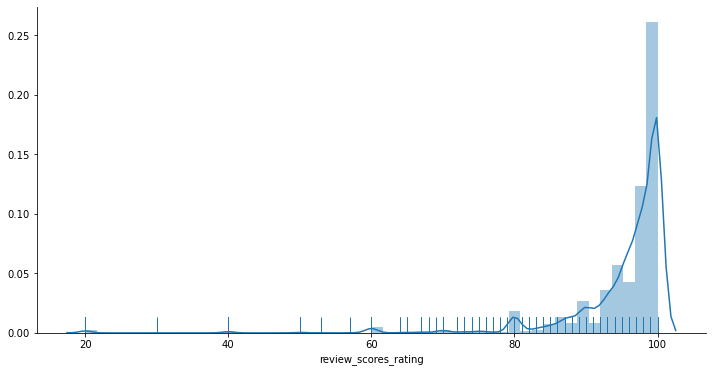

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [7]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings['price'].describe()

count     7002.000000
mean       204.358082
std        455.366044
min         10.000000
25%         85.000000
50%        135.000000
75%        215.000000
max      25000.000000
Name: price, dtype: float64

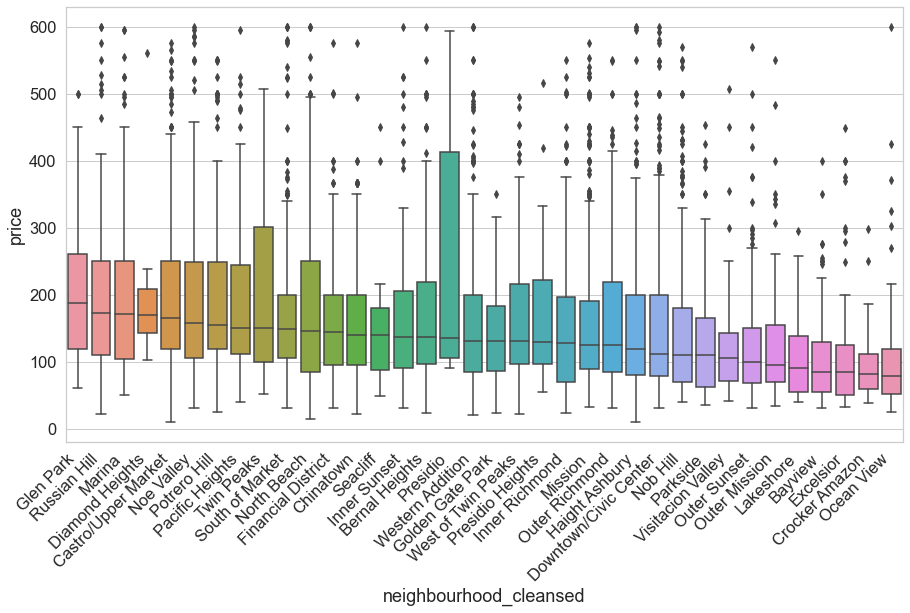

In [8]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5, style='whitegrid')

sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [10]:
calendar = pd.read_csv('calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 368 days and 7002 unique listings in the calendar data.


In [11]:
calendar5 = pd.read_csv('calendar5.csv.gz')
print('We have', calendar5.date.nunique(), 'days and', calendar5.listing_id.nunique(), 'unique listings in the calendar data.')

We have 372 days and 6598 unique listings in the calendar data.


In [12]:
calendar10 = pd.read_csv('calendar10.csv.gz')
print('We have', calendar10.date.nunique(), 'days and', calendar10.listing_id.nunique(), 'unique listings in the calendar data.')

We have 365 days and 6564 unique listings in the calendar data.


In [13]:
calendar.date.min(), calendar.date.max()

('2021-01-08', '2022-01-10')

In [14]:
calendar5.date.min(), calendar5.date.max()

('2021-05-07', '2022-05-13')

In [15]:
calendar10.date.min(), calendar10.date.max()

('2021-10-06', '2022-10-05')

In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555806 entries, 0 to 2555805
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 136.5+ MB


<ipython-input-17-8dca42507c87>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



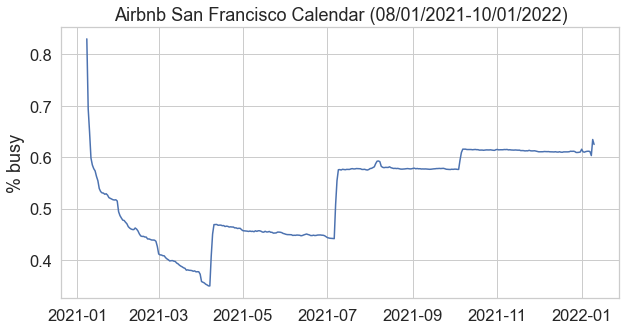

In [17]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb San Francisco Calendar (08/01/2021-10/01/2022)')
plt.ylabel('% busy')
plt.show();

<ipython-input-18-3653318dc253>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



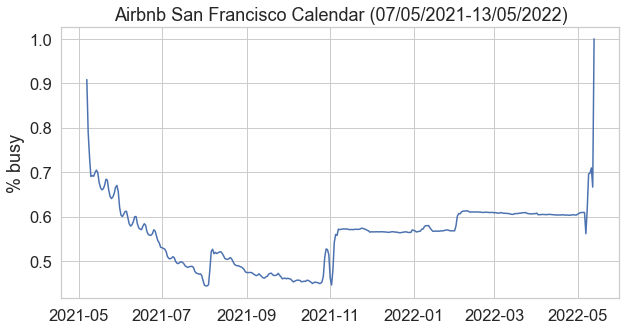

In [18]:
calendar5_new = calendar5[['date', 'available']]
calendar5_new['busy'] = calendar5_new.available.map( lambda x: 0 if x == 't' else 1)
calendar5_new = calendar5_new.groupby('date')['busy'].mean().reset_index()
calendar5_new['date'] = pd.to_datetime(calendar5_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar5_new['date'], calendar5_new['busy'])
plt.title('Airbnb San Francisco Calendar (07/05/2021-13/05/2022)')
plt.ylabel('% busy')
plt.show();

<ipython-input-19-fb20cfb53c5f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



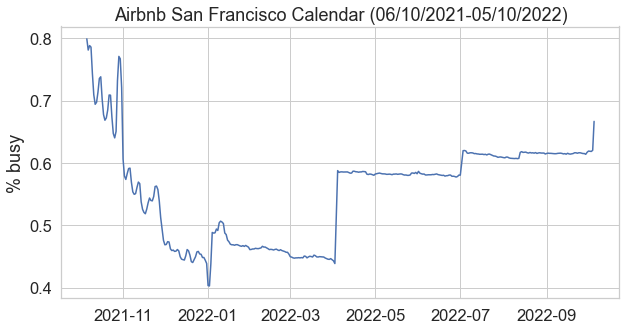

In [19]:
calendar10_new = calendar10[['date', 'available']]
calendar10_new['busy'] = calendar10_new.available.map( lambda x: 0 if x == 't' else 1)
calendar10_new = calendar10_new.groupby('date')['busy'].mean().reset_index()
calendar10_new['date'] = pd.to_datetime(calendar10_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar10_new['date'], calendar10_new['busy'])
plt.title('Airbnb San Francisco Calendar (06/10/2021-05/10/2022)')
plt.ylabel('% busy')
plt.show();

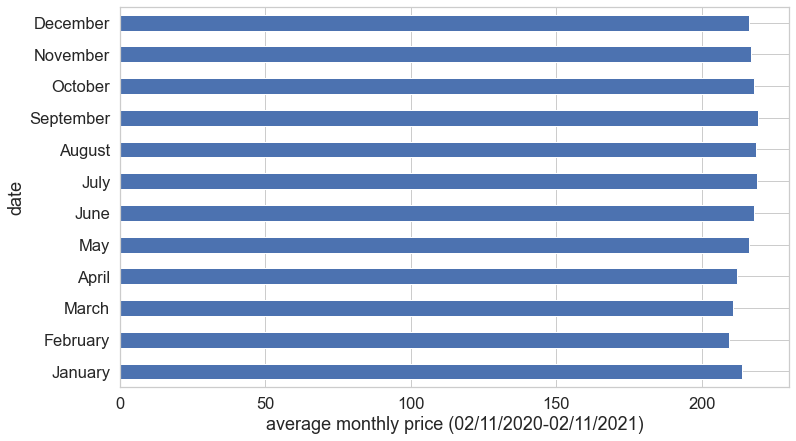

In [20]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price (02/11/2020-02/11/2021)');

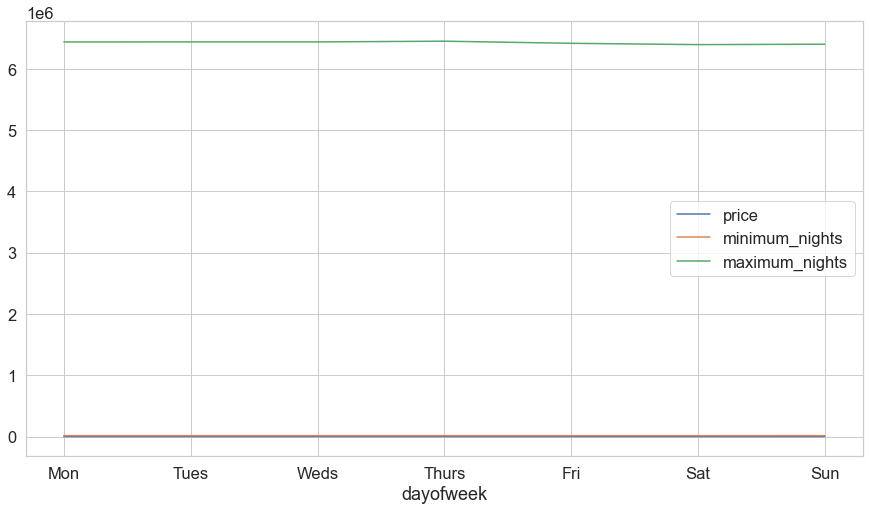

In [21]:
calendar['dayofweek'] = calendar.date.dt.day_name()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week = calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);